In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
# Load the Iris dataset (only 2 classes: setosa and versicolor for binary classification)
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Use only class 0 and 1 for binary classification
X_binary = X[y != 2]
y_binary = y[y != 2]

In [4]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)


In [5]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [6]:

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of class 1


In [7]:
# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)


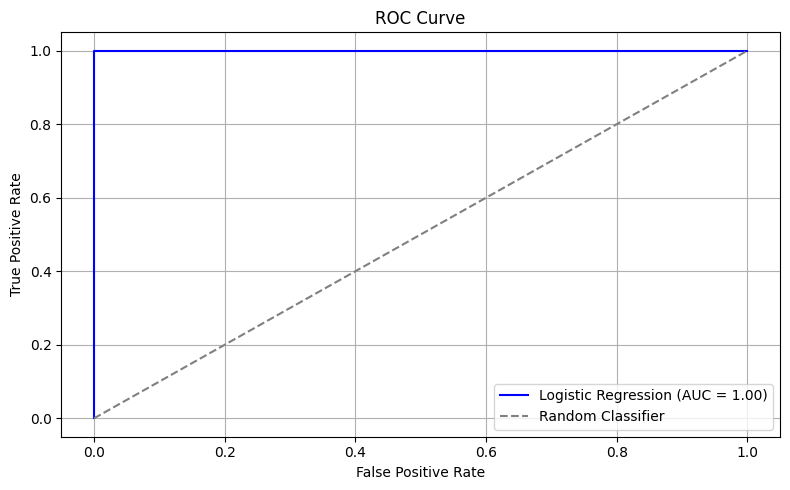

In [8]:
# Plot ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()